In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Loading the data

In [238]:
stats_df = pd.read_csv('NBA_future_PER_data.csv')
stats_df_copy = stats_df.copy()
#Drop columns that won't help our model
stats_df.drop(["Player", "Year","Pos", "Tm","GS","MP","G"],axis=1, inplace = True)


### Linear Regresion

In [203]:
#Split the dataframe to train and test
X_train1,X_test1,y_train1,y_test1 = train_test_split(stats_df.drop(['Future_PER'],axis=1),stats_df['Future_PER'],test_size=0.3,random_state=42)

In [204]:
#Fit the model
lr = linear_model.LinearRegression()
lr.fit(X_train1,y_train1)

LinearRegression()

In [205]:
#Predict the outcome
y_pred1 = lr.predict(X_test1)
y_pred1

array([ 9.77503803, 16.87295662, 17.8373147 , ..., 20.77250348,
       10.99409702, 12.17924779])

In [206]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test1,y_pred1)}')
print(f'mse: {metrics.mean_squared_error(y_test1,y_pred1)}')


r^2: 0.6674933026874252
mse: 7.515896528902206


In [207]:
#Check the coefficient of the model
for k,v in sorted(dict(zip(stats_df.columns,(lr.coef_))).items(),key=lambda x:x[1],reverse=True):
    print(k,v)

2P% 3.1659499844338534
PER 0.7696488007582047
2P 0.012419067073809055
TOV 0.009103658550467337
3PA 0.00373460176038691
DRB 0.003725664769088068
FG 0.0036749250655102764
FT 0.0029018395142260353
BLK 0.0025443776167281005
PTS 0.0015075476415046189
TRB 4.0836852612791065e-05
AST -2.2280353023799274e-05
FGA -0.0028397365632817566
STL -0.003273384361243027
FTA -0.0035428537734562915
ORB -0.003684827912023419
2PA -0.006574338327648591
PF -0.0067053821698253024
3P -0.00874414200916053
Age -0.15646993622153596
FT% -0.34144433817120806
3P% -0.7615078996864484
FG% -3.0136729777166664
eFG% -12.096251451451423


Text(0, 0.5, 'Predicted')

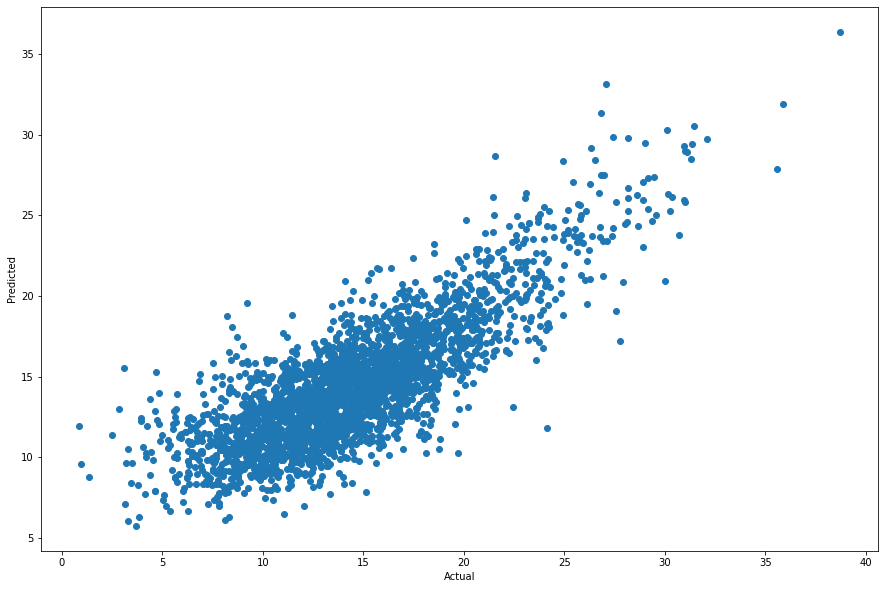

In [208]:
#We can see that our model predicted the PER with good results
plt.figure(figsize=(15,10))
plt.scatter(y_test1,y_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [209]:
#Check the difference between the predicted value and the actual value
compare_df = pd.DataFrame({'Actual':y_test1,'Predicted':y_pred1,'Difference':abs(y_test1-y_pred1)})
compare_df

,Actual,Predicted,Difference
4078,11.43,9.775038,1.654962
4132,13.99,16.872957,2.882957
7415,16.76,17.837315,1.077315
7023,16.78,17.916273,1.136273
5993,12.00,13.613739,1.613739
...,...,...,...
3688,23.99,25.512303,1.522303
9197,15.15,18.640347,3.490347
756,24.10,20.772503,3.327497
2644,10.29,10.994097,0.704097


### Decision Tree Regressor


In [210]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor()

In [211]:
#Split the dataframe to train and test
X_train2,X_test2,y_train2,y_test2 = train_test_split(stats_df.drop(['Future_PER'],axis=1),stats_df['Future_PER'],test_size=0.3,random_state=42)

In [212]:
#Fit the model
DecisionTreeRegressor(criterion='mse',max_depth=None,max_features=None,max_leaf_nodes=None,min_impurity_split=None,
                      min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,
                      presort=False,random_state=42,splitter='best')
dectree.fit(X_train2,y_train2)

DecisionTreeRegressor()

In [213]:
#Predict the outcome
y_pred2 = dectree.predict(X_test2)
y_pred2

array([ 8.65, 19.28, 16.16, ..., 27.79, 10.18, 13.08])

In [214]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test2,y_pred2)}')
print(f'mse: {metrics.mean_squared_error(y_test2,y_pred2)}')


r^2: 0.3179554666630927
mse: 15.416760570824524


Text(0, 0.5, 'Predicted')

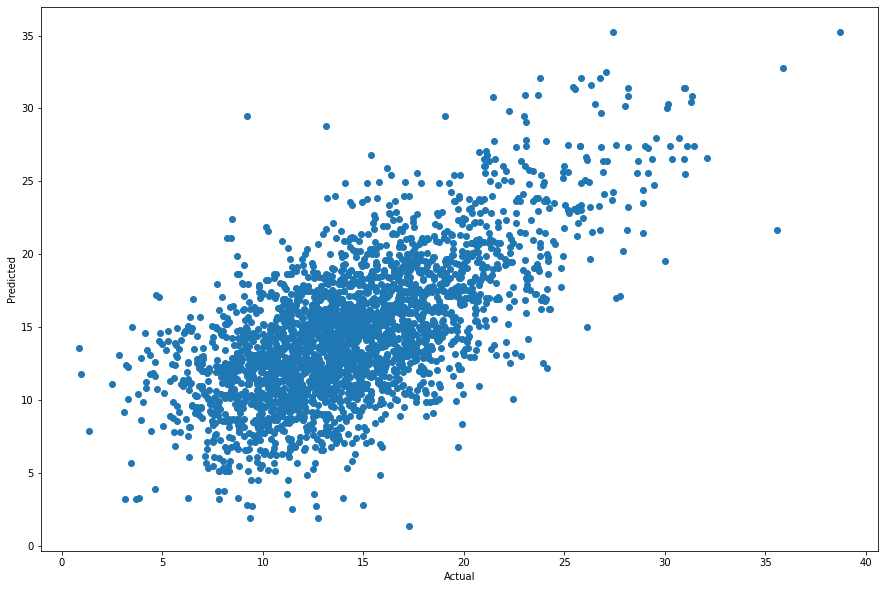

In [215]:
#We can see that our model predicted the PER with less better results
plt.figure(figsize=(15,10))
plt.scatter(y_test2,y_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [216]:
#Check the difference between the predicted value and the actual value
compare_df2 = pd.DataFrame({'Actual':y_test2,'Predicted':y_pred2,'Difference':abs(y_test2-y_pred2)})
compare_df2

,Actual,Predicted,Difference
4078,11.43,8.65,2.78
4132,13.99,19.28,5.29
7415,16.76,16.16,0.60
7023,16.78,19.92,3.14
5993,12.00,17.89,5.89
...,...,...,...
3688,23.99,23.66,0.33
9197,15.15,19.24,4.09
756,24.10,27.79,3.69
2644,10.29,10.18,0.11


### Random Forest Regressor

In [227]:
from sklearn.ensemble import RandomForestRegressor
rndfor= RandomForestRegressor()

In [228]:
#Split the dataframe to train and test
X_train3,X_test3,y_train3,y_test3 = train_test_split(stats_df.drop(['Future_PER'],axis=1),stats_df['Future_PER'],test_size=0.3,random_state=42)

In [229]:
#Fit the model
rndfor.fit(X_train3,y_train3)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_jobs=None, oob_score=False, random_state=42,verbose=0,warm_start=False)

RandomForestRegressor(random_state=42)

In [230]:
#Predict the outcome
y_pred3 = rndfor.predict(X_test3)
y_pred3

array([10.0982, 16.2199, 16.303 , ..., 21.9452, 10.0567, 12.1721])

In [231]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test3,y_pred3)}')
print(f'mse: {metrics.mean_squared_error(y_test3,y_pred3)}')

r^2: 0.6530714744084871
mse: 7.841883854806201


Text(0, 0.5, 'Predicted')

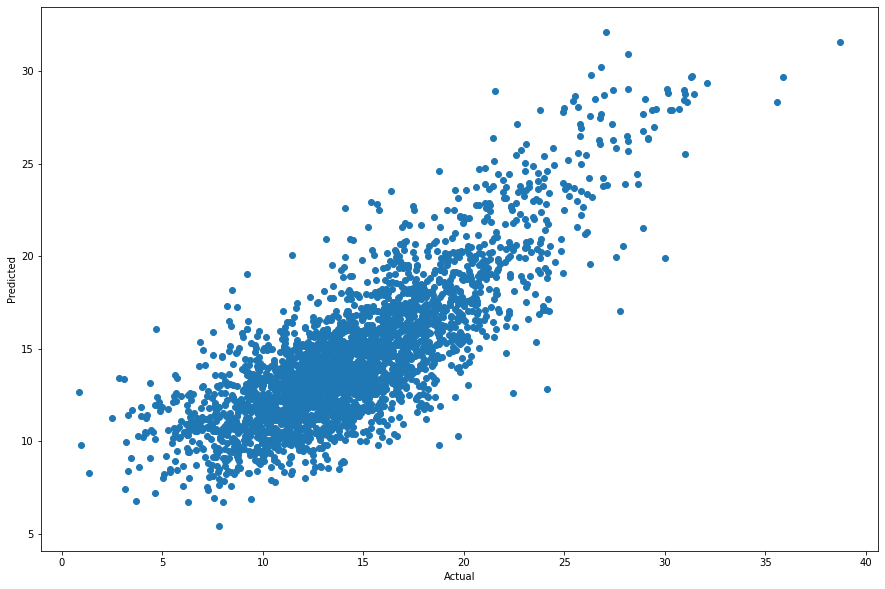

In [232]:
#We can see that our model predicted the PER with almost as good as linear regression results
plt.figure(figsize=(15,10))
plt.scatter(y_test3,y_pred3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [233]:
#Check the difference between the predicted value and the actual value
compare_df3 = pd.DataFrame({'Actual':y_test3,'Predicted':y_pred3,'Difference':abs(y_test3-y_pred3)})
compare_df3

,Actual,Predicted,Difference
4078,11.43,10.0982,1.3318
4132,13.99,16.2199,2.2299
7415,16.76,16.3030,0.4570
7023,16.78,17.8098,1.0298
5993,12.00,13.2569,1.2569
...,...,...,...
3688,23.99,25.3889,1.3989
9197,15.15,17.9264,2.7764
756,24.10,21.9452,2.1548
2644,10.29,10.0567,0.2333


### MSE and R^2 score comparison

In [241]:
#Create dataframe for comparison of algorithms
r2_mse_comp_data = {'r^2':[metrics.r2_score(y_test1,y_pred1),metrics.r2_score(y_test2,y_pred2),metrics.r2_score(y_test3,y_pred3)],
                  'MSE':[metrics.mean_squared_error(y_test1,y_pred1),metrics.mean_squared_error(y_test2,y_pred2),
                         metrics.mean_squared_error(y_test3,y_pred3)]}
r2_mse_comp_df= pd.DataFrame(r2_mse_comp_data,index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor'])
r2_mse_comp_df

,r^2,MSE
Linear Regression,0.667493,7.515897
Decision Tree Regressor,0.317955,15.416761
Random Forest Regressor,0.653071,7.841884


<module 'matplotlib.pyplot' from 'C:\\Users\\yardi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

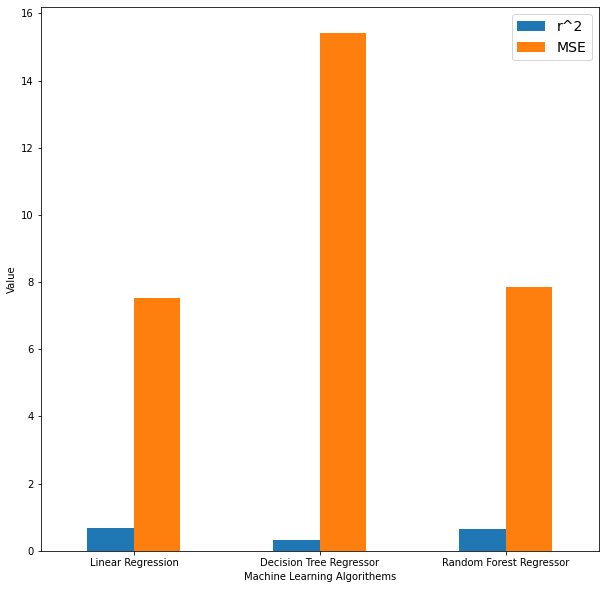

In [235]:
#We can see that the best algorithem is the one with the largest r^2 score and the minimal MSE score, meaning Linear Regression.
r2_mse_comp_df.plot.bar(rot=0,figsize=(10,10))
plt.legend(fontsize = 14)
plt.xlabel('Machine Learning Algorithems')
plt.ylabel('Value')
plt



### We can see that the Linear Regression has the besr r^2 score and the lowest maen square error

In [263]:
from copy import deepcopy
teamname = 'TOR'
with open('basketball_plots/srcdata/' + teamname.lower() + '_hexbin_stats.pickle', 'rb') as f:
    team_hexbin_stats = pickle.load(f)

rel_hexbin_stats = deepcopy(team_hexbin_stats)
base_hexbin_stats = deepcopy(league_hexbin_stats)
rel_hexbin_stats['accs_by_hex'] = rel_hexbin_stats['accs_by_hex'] - base_hexbin_stats['accs_by_hex']
rel_hexbin_stats = filt_hexbins(rel_hexbin_stats, min_threshold=0.0)

xlocs = rel_hexbin_stats['xlocs']
ylocs = rel_hexbin_stats['ylocs']
accs_by_hex = rel_hexbin_stats['accs_by_hex']
freq_by_hex = np.array([min(max_freq, i) for i in rel_hexbin_stats['freq_by_hex']])

colorscale = 'RdYlBu_r'
marker_cmin = -0.05
marker_cmax = 0.05
title_txt = teamname + ":<BR>Shot chart, '18-'19<BR>(vs NBA average)"

hexbin_text = [
        '<i>Accuracy: </i>' + str(round(accs_by_hex[i]*100, 1)) + '% (vs league avg)<BR>'
        '<i>Frequency: </i>' + str(round(freq_by_hex[i]*100, 2)) + '%'
        for i in range(len(freq_by_hex))
]
ticktexts = ["Worse", "Average", "Better"]
logo_url = "https://d2p3bygnnzw9w3.cloudfront.net/req/202001161/tlogo/bbr/" + teamname + ".png"

fig = go.Figure()
draw_plotly_court(fig, fig_width=600)
fig.add_trace(go.Scatter(
    x=xlocs, y=ylocs, mode='markers', name='markers',
    text=hexbin_text,
    marker=dict(
        size=freq_by_hex, sizemode='area', sizeref=2. * max(freq_by_hex) / (11. ** 2), sizemin=2.5,
        color=accs_by_hex, colorscale=colorscale,
        colorbar=dict(
            thickness=15,
            x=0.84,
            y=0.87,
            yanchor='middle',
            len=0.2,
            title=dict(
                text="<B>Accuracy</B>",
                font=dict(
                    size=11,
                    color='#4d4d4d'
                ),
            ),
            tickvals=[marker_cmin, (marker_cmin + marker_cmax) / 2, marker_cmax],
            ticktext=ticktexts,
            tickfont=dict(
                size=11,
                color='#4d4d4d'
            )
        ),
        cmin=marker_cmin, cmax=marker_cmax,
        line=dict(width=1, color='#333333'), symbol='hexagon',
    ),
    hoverinfo='text'
))

fig.update_layout(
    title=dict(
        text=title_txt,
        y=0.9,
        x=0.19,
        xanchor='left',
        yanchor='middle'),
    font=dict(
        family="Arial, Tahoma, Helvetica",
        size=10,
        color="#7f7f7f"
    ),
    annotations=[
        go.layout.Annotation(
            x=0.5,
            y=0.05,
            showarrow=False,
            text="Twitter: @_jphwang",
            xref="paper",
            yref="paper"
        ),
    ],
)

fig.add_layout_image(
    go.layout.Image(
        source=logo_url,
        xref="x", yref="y", x=-230, y=405, sizex=50, sizey=50,
        xanchor="left", yanchor="top",
        sizing="stretch", opacity=1, layer="above"))

fig.show(config=dict(displayModeBar=False))